In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Disables INFO & WARNING logs
import tensorflow as tf
import keras
import numpy as np
from utils import center_crop
import matplotlib.pyplot as plt
from maptd_model import maptd_model

In [6]:
modelpath = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD_TF2/data/ckpts/models/0/modified_model'

In [7]:
model = keras.models.load_model(modelpath)
#model = maptd_model(input_size=512)

In [ ]:
model_config = model.get_config()

In [ ]:
input_layer_name = model_config['layers'][0]['name']

In [ ]:
model_config['layers'][0]
model_config['layers'][0] = {
                      'name': 'new_input',
                      'class_name': 'InputLayer',
                      'config': {
                          'batch_input_shape': (None, None, None, 3),
                          'dtype': 'float32',
                          'sparse': False,
                          'name': 'new_input'
                      },
                      'inbound_nodes': []
                  }

model_config['layers'][1]['inbound_nodes'] = [[['new_input', 0, 0, {}]]]
model_config['input_layers'] = [['new_input', 0, 0]]
model_config['layers'][-5]['config']['activation'] = tf.atan # NOTE: I added this modification, because I forgot to add the tf.atan as a custom object of keras when I created the model
new_model = model.__class__.from_config(model_config, custom_objects={})  # change custom objects if necessary

In [ ]:
# iterate over all the layers that we want to get weights from
weights = [layer.get_weights() for layer in model.layers[1:]]
for layer, weight in zip(new_model.layers[1:], weights):
    layer.set_weights(weight)

In [ ]:
#new_model.save('D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD_TF2/data/ckpts/models/0')

In [12]:
img = np.expand_dims(plt.imread('D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD_TF2/data/general_dataset/images/D5005-5028149.tiff'), axis=0)
img = img[:, :6144, :7168, :]
img.shape
#img = center_crop(img, crop_shape=(2560, 2560))
p = model(img, training=False)

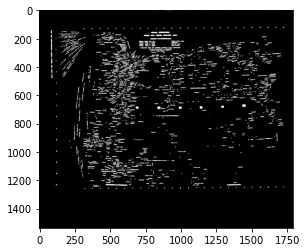

In [15]:
plt.imshow(np.where(p[0][0] > 0.8, 1, 0), cmap='gray')
plt.show()

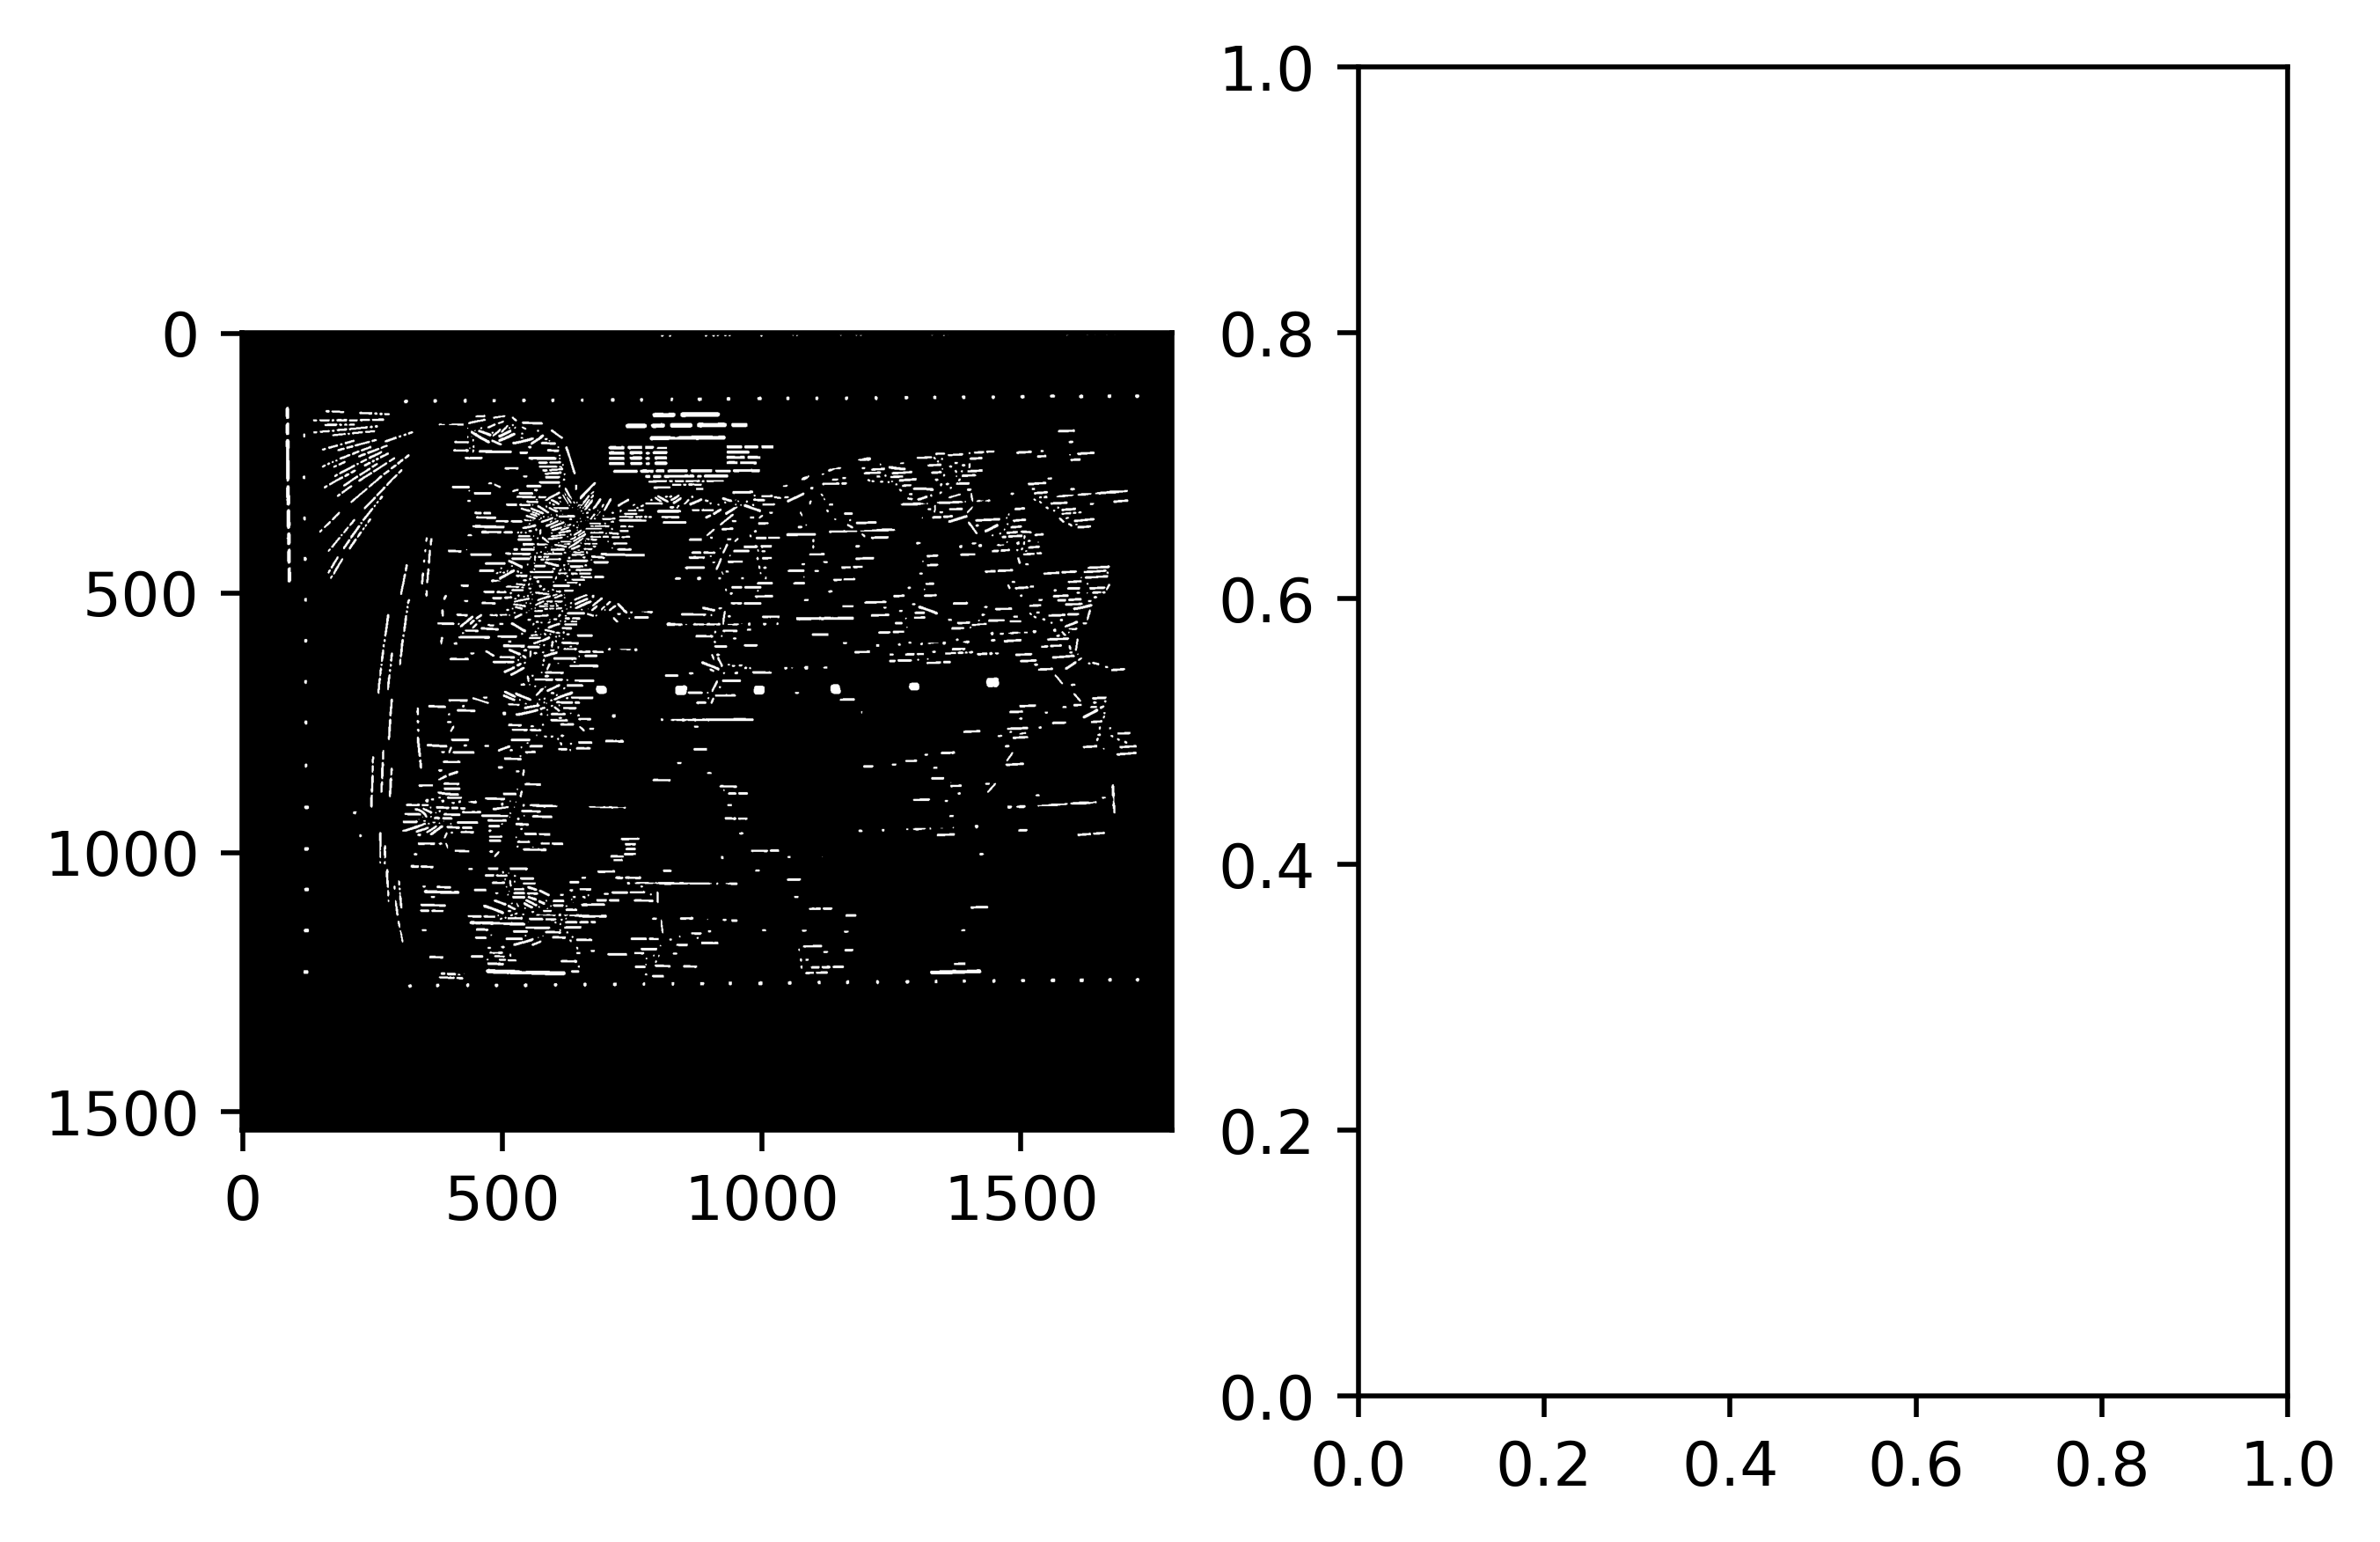

In [16]:
fig, ax = plt.subplots(1, 2, dpi=500)
ax[0].imshow(np.where(p[0][0] > 0.8, 1, 0), cmap='gray')
plt.show()